In [1]:
%ls datasets

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv ('datasets/antropometria-dataset.csv')
df.head(2)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101


In [8]:
df.drop(['folio', 'code_upm', 'htension', 'est_dis', 'est_urb', 'est_marg' , 'pondef' ,'est_var','sistol' , 'hpresion' , 'tbrazo','sistol','emb' , 'temb' , 'diastol', 'PrimaryLast'],
axis=1,
inplace=True)

In [9]:
df

,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,cintura,cadera
0,2,21,PUEBLA,2,38,8,73.70,2,146.40,98.70,106.0
1,3,10,DURANGO,2,11,11,35.65,2,145.10,64.00,75.0
2,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.00,67.60,94.3
3,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.50,60.60,72.2
4,3,21,PUEBLA,2,19,3,97.95,2,161.00,113.00,127.0
...,...,...,...,...,...,...,...,...,...,...,...
18635,2,30,VERACRUZ DE IGNACIO DE LA LLAVE,2,73,11,75.80,1,141.15,93.00,113.0
18636,1,4,CAMPECHE,2,75,0,69.40,1,144.80,103.05,113.7
18637,1,30,VERACRUZ DE IGNACIO DE LA LLAVE,1,86,7,46.75,2,149.20,71.35,86.0
18638,1,25,SINALOA,2,72,7,59.05,2,142.50,99.95,94.8


In [10]:
all(isinstance(column, str) for column in df.columns)

True

In [11]:
df.dropna(inplace= True)
df

,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,cintura,cadera
0,2,21,PUEBLA,2,38,8,73.70,2,146.40,98.70,106.0
1,3,10,DURANGO,2,11,11,35.65,2,145.10,64.00,75.0
2,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.00,67.60,94.3
3,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.50,60.60,72.2
4,3,21,PUEBLA,2,19,3,97.95,2,161.00,113.00,127.0
...,...,...,...,...,...,...,...,...,...,...,...
18635,2,30,VERACRUZ DE IGNACIO DE LA LLAVE,2,73,11,75.80,1,141.15,93.00,113.0
18636,1,4,CAMPECHE,2,75,0,69.40,1,144.80,103.05,113.7
18637,1,30,VERACRUZ DE IGNACIO DE LA LLAVE,1,86,7,46.75,2,149.20,71.35,86.0
18638,1,25,SINALOA,2,72,7,59.05,2,142.50,99.95,94.8


In [12]:
y= pd.DataFrame(df['peso'])
x =pd.DataFrame(df['cintura'])
lm= linear_model.LinearRegression()
model_lm=lm.fit(x,y)
model_lm

LinearRegression()

In [13]:
print('The y intercetpt, B0 is =' , model_lm.intercept_)
print('the coef., b1 is =' , model_lm.coef_)
print('theR^2, is =', model_lm.score(x,y))

The y intercetpt, B0 is = [-8.31365631]
the coef., b1 is = [[0.83156762]]
theR^2, is = 0.626752266114085


In [14]:
modelA = sm.OLS.from_formula('peso ~ cintura', data = df)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        03:05:01   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3137      0.427    -19.458      0.000      -9.151      -7.476
cintura        0.8316      0.005    173.999      0.000       0.822       0.841
==============================================================================
Omnibus:                    12737.948   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1022852.813
Skew:                          -2.683   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
Tabla = df.iloc[:,3:]
Tabla

,sexo,edad,meses,peso,ropa,talla,cintura,cadera
0,2,38,8,73.70,2,146.40,98.70,106.0
1,2,11,11,35.65,2,145.10,64.00,75.0
2,2,18,8,54.80,1,162.00,67.60,94.3
3,1,10,8,33.40,2,146.50,60.60,72.2
4,2,19,3,97.95,2,161.00,113.00,127.0
...,...,...,...,...,...,...,...,...
18635,2,73,11,75.80,1,141.15,93.00,113.0
18636,2,75,0,69.40,1,144.80,103.05,113.7
18637,1,86,7,46.75,2,149.20,71.35,86.0
18638,2,72,7,59.05,2,142.50,99.95,94.8


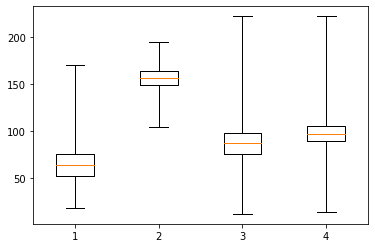

In [16]:
plt.clf()
Boxplotvariables = plt.boxplot([Tabla['peso'], Tabla['talla'], Tabla['cintura'], Tabla['cadera']],
whis=(0, 100))

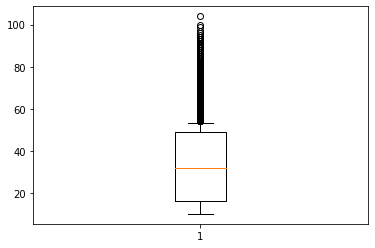

In [17]:
plt.clf()
boxplotedad = plt.boxplot(Tabla['edad'], whis= (0,80))

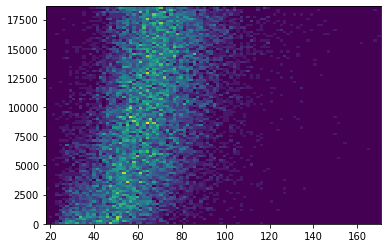

In [18]:
fig= plt.figure()
X = list(Tabla['peso'])
a = list(Tabla['talla'])
b = list(Tabla['cintura'])
c = list(Tabla['cadera'])
Y = list(Tabla.index)



_ = plt.hist2d(X,Y, bins = 100)


plt.show()




In [19]:
hola =plt.bar

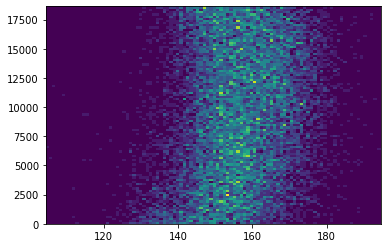

In [20]:
fig1 =plt.hist2d(a,Y, bins = 100)

plt.show()


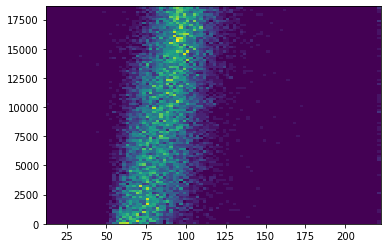

In [21]:
fig1 =plt.hist2d(b,Y, bins = 100)

plt.show()

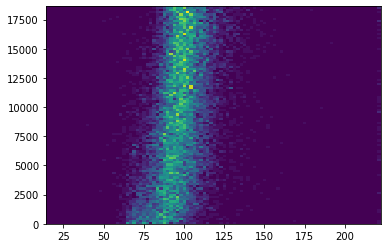

In [22]:
fig1 =plt.hist2d(c,Y, bins = 100)

plt.show()

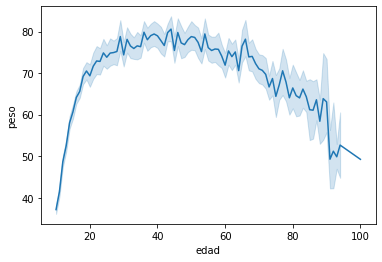

In [23]:
sexo1 = Tabla.query("sexo == '1'")
sns.lineplot(data=sexo1, x='edad', y='peso')

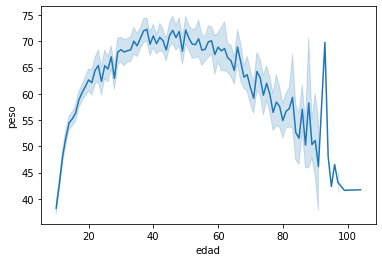

In [24]:
sexo2 = Tabla.query("sexo == '2'")
sns.lineplot(data=sexo2, x='edad', y='peso')

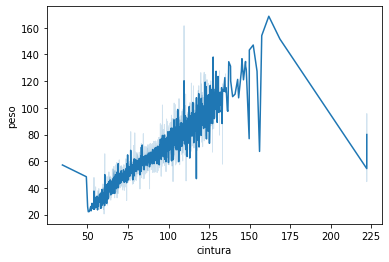

In [25]:
sexo2_2 = Tabla.query("sexo == '2'")
sns.lineplot(data=sexo2_2, x='cintura', y='peso')

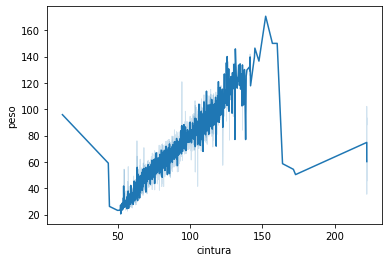

In [26]:
sexo1_1 = Tabla.query("sexo == '1'")
sns.lineplot(data=sexo1_1, x='cintura', y='peso')

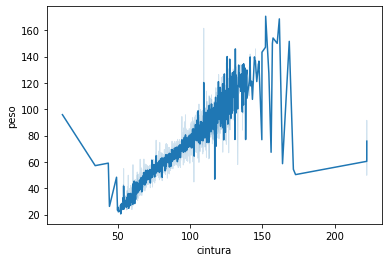

In [27]:
pesovscintura = Tabla
sns.lineplot(data=pesovscintura, x= 'cintura', y='peso')

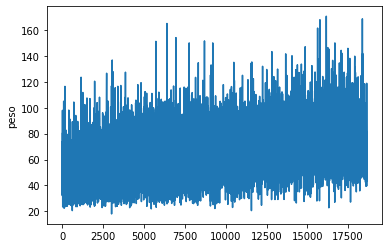

In [28]:
peso = Tabla
sns.lineplot(data=pesovscintura, x= Tabla.index , y='peso')

In [29]:
df.head()

,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,cintura,cadera
0,2,21,PUEBLA,2,38,8,73.70,2,146.4,98.7,106.0
1,3,10,DURANGO,2,11,11,35.65,2,145.1,64.0,75.0
2,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,67.6,94.3
3,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,60.6,72.2
4,3,21,PUEBLA,2,19,3,97.95,2,161.0,113.0,127.0


In [30]:
Tabla1 = df

In [31]:

Tabla1.drop([ 'intp','entidad' , 'edad','meses', 'peso', 'ropa','talla','cintura','cadera'],
axis=1,
inplace=True)

In [32]:
Tabla1

,desc_ent,sexo
0,PUEBLA,2
1,DURANGO,2
2,AGUASCALIENTES,2
3,DISTRITO FEDERAL,1
4,PUEBLA,2
...,...,...
18635,VERACRUZ DE IGNACIO DE LA LLAVE,2
18636,CAMPECHE,2
18637,VERACRUZ DE IGNACIO DE LA LLAVE,1
18638,SINALOA,2


In [33]:
Tabla1.rename(columns = {'desc_ent': 'LUGAR'},
          inplace = True
         )

In [34]:
Tabla1.set_index('LUGAR',inplace = True)

In [35]:
Tabla1.rename(columns = {'sexo': '1'},
          inplace = True
         )
Tabla1.head()

,1
LUGAR,
PUEBLA,2
DURANGO,2
AGUASCALIENTES,2
DISTRITO FEDERAL,1
PUEBLA,2


In [4]:

myPivot = pd.pivot_table(df,
                         index = ['desc_ent'],
                         values = ['sexo'],
                         aggfunc = ['median'],
                         columns = 'index',
                         margins = True
                        )
myPivot

NameError: name 'pd' is not defined

SyntaxError: invalid syntax (1846100034.py, line 2)